
# Project: TMDB Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
The TMDB movie dataset gives information about the movies produced between 1950 and 2015. It contains nine to ten thousand movies collected from The Movie Data Base(TMDB). It consist of twenty one columns such as cast, genre, production, budget, revenue, and so many other information related to film making. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling
### General Properties

In [5]:
df = pd.read_csv('tmdb-movies.csv')

In [6]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
df.shape

(10866, 21)

### This dataset has 10,866 rows and 21 columns.

## Data Cleaning: This dataset looks clean, but we cannot be sure of how clean it is, until we check for null values, duplicates, wrong datatypes, and fix them up. I will check for duplicated data first.

In [9]:
df[df['id'].duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [10]:
df = df.drop(2089)


In [11]:
df[df['id'].duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

From this information, we can see that the Homepage, tagline, production companies, and keywords have so many null values. I will drop them, and the other rows which I do not need for my analysis. 

In [13]:
df.drop(['imdb_id','cast','homepage','tagline','keywords','production_companies','budget','revenue','release_date','director','vote_count','overview'], axis=1, inplace = True)

The currency of budget and revenue are not mentioned. Since this is a dataset concerning Hollywood movies, we'll take all the monetary columns in US Dollars. Column names would also be changed

In [14]:
df.rename(columns = {'budget_adj' : 'budget'}, inplace = True)
df.rename(columns = {'revenue_adj' : 'revenue'}, inplace = True) 

In [15]:
df.isnull().sum()

id                 0
popularity         0
original_title     0
runtime            0
genres            23
vote_average       0
release_year       0
budget             0
revenue            0
dtype: int64

We can observe that genres has 23 null values. The 23 rows affected would be dropped, because it does not contain interger values which can esily be replaced.

In [16]:
df.dropna(inplace = True)
df.isnull().sum()

id                0
popularity        0
original_title    0
runtime           0
genres            0
vote_average      0
release_year      0
budget            0
revenue           0
dtype: int64

In [17]:
df.dtypes

id                  int64
popularity        float64
original_title     object
runtime             int64
genres             object
vote_average      float64
release_year        int64
budget            float64
revenue           float64
dtype: object

We will now convert vote_average, budget and revenue to integer data type

In [18]:
df['vote_average'] = (df.vote_average).astype(int)

Now, let us create a new column for Profit in USD

In [19]:
df['Profit'] = df['revenue'] - df['budget']

In [20]:
df.head()

,id,popularity,original_title,runtime,genres,vote_average,release_year,budget,revenue,Profit
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,7,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,6,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,7,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,7,2015,1.747999e+08,1.385749e+09,1.210949e+09


# Research Question 1:
What is the most popular movie?

In order to answer this question, we have to write a function to display the maximum and minimum of whatever we require with it's full information

In [21]:
def Max(x):
    y = df[df[x] == df[x].max()]
    max1 = y[['popularity','runtime','genres','vote_average','release_year','original_title','budget','revenue','Profit',]]
    return max1

In [22]:
def Min(x):
    y = df[df[x] == df[x].min()]
    min1 = y[['popularity','runtime','genres','vote_average','release_year','original_title','budget','revenue','Profit',]]
    return min1

In [23]:
Max('popularity')

,popularity,runtime,genres,vote_average,release_year,original_title,budget,revenue,Profit
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,6,2015,Jurassic World,1.379999e+08,1.392446e+09,1.254446e+09


#### From this analysis, we can see that the most popular movie is titled 'Jurassic world'. It was produced 2015.

What is the effect of it's popularity? Does it popularity have effect on the revenue it generated?
In order to answer this question, wewould like to see the maximum revenue generated

In [24]:
Max('Profit')

,popularity,runtime,genres,vote_average,release_year,original_title,budget,revenue,Profit
1329,12.037933,121,Adventure|Action|Science Fiction,7,1977,Star Wars,3.957559e+07,2.789712e+09,2.750137e+09


From this result, we can see that, the fact that Jurassic world is the most popular movie, does not make it the movie with the  highest revenue generated. Now, let us see the movie with the minimum popularity

In [25]:
Min('popularity')

,popularity,runtime,genres,vote_average,release_year,original_title,budget,revenue,Profit
6181,0.000065,561,Drama|History|Western,6,1985,"North and South, Book I",0.0,0.0,0.0


North and South, the movie with the minimum popularity has no record of both budget and revenue. I searched for it on The Movie Database, and discovered that it had the values for both budget and revenue were not recorded. It is practically impossible for a movie to have zero budget. Let us see the number of movies with zero revenue.

In [26]:
revenue = (df.revenue == 0).sum()
revenue

5993

This means that about 50% of this data set has zero budget. Let us view the other movies with zero revenue.

In [27]:
df[df['revenue'] == 0]

,id,popularity,original_title,runtime,genres,vote_average,release_year,budget,revenue,Profit
48,265208,2.932340,Wild Card,92,Thriller|Crime|Drama,5,2015,2.759999e+07,0.0,-2.759999e+07
67,334074,2.331636,Survivor,96,Crime|Thriller|Action,5,2015,1.839999e+07,0.0,-1.839999e+07
74,347096,2.165433,Mythica: The Darkspore,108,Action|Adventure|Fantasy,5,2015,0.000000e+00,0.0,0.000000e+00
75,308369,2.141506,Me and Earl and the Dying Girl,105,Comedy|Drama,7,2015,0.000000e+00,0.0,0.000000e+00
92,370687,1.876037,Mythica: The Necromancer,0,Fantasy|Action|Adventure,5,2015,0.000000e+00,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,The Endless Summer,95,Documentary,7,1966,0.000000e+00,0.0,0.000000e+00
10862,20379,0.065543,Grand Prix,176,Action|Adventure|Drama,5,1966,0.000000e+00,0.0,0.000000e+00
10863,39768,0.065141,Beregis Avtomobilya,94,Mystery|Comedy,6,1966,0.000000e+00,0.0,0.000000e+00
10864,21449,0.064317,"What's Up, Tiger Lily?",80,Action|Comedy,5,1966,0.000000e+00,0.0,0.000000e+00


I researched the first on this list, Mr Homes and discovered that it had a budget of eleven million dollars, and a revenue of $29,355,203. This indicates that the zero values in budget and revenue are missing values. In order not to have distorted representation of data, I will replace them with null values

In [28]:
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
df['Profit'] = df['Profit'].replace(0, np.NaN)

In [29]:
df[df['revenue'].isnull()]

,id,popularity,original_title,runtime,genres,vote_average,release_year,budget,revenue,Profit
48,265208,2.932340,Wild Card,92,Thriller|Crime|Drama,5,2015,2.759999e+07,NaN,-2.759999e+07
67,334074,2.331636,Survivor,96,Crime|Thriller|Action,5,2015,1.839999e+07,NaN,-1.839999e+07
74,347096,2.165433,Mythica: The Darkspore,108,Action|Adventure|Fantasy,5,2015,NaN,NaN,NaN
75,308369,2.141506,Me and Earl and the Dying Girl,105,Comedy|Drama,7,2015,NaN,NaN,NaN
92,370687,1.876037,Mythica: The Necromancer,0,Fantasy|Action|Adventure,5,2015,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,The Endless Summer,95,Documentary,7,1966,NaN,NaN,NaN
10862,20379,0.065543,Grand Prix,176,Action|Adventure|Drama,5,1966,NaN,NaN,NaN
10863,39768,0.065141,Beregis Avtomobilya,94,Mystery|Comedy,6,1966,NaN,NaN,NaN
10864,21449,0.064317,"What's Up, Tiger Lily?",80,Action|Comedy,5,1966,NaN,NaN,NaN


In [30]:
Revenue = df[df['revenue'].notnull()]
Revenue

,id,popularity,original_title,runtime,genres,vote_average,release_year,budget,revenue,Profit
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,7,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,6,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,7,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,7,2015,1.747999e+08,1.385749e+09,1.210949e+09
...,...,...,...,...,...,...,...,...,...,...
10822,396,0.670274,Who's Afraid of Virginia Woolf?,131,Drama,7,1966,5.038511e+07,2.266436e+08,1.762585e+08
10828,5780,0.402730,Torn Curtain,128,Mystery|Thriller,6,1966,2.015404e+07,8.733419e+07,6.718015e+07
10829,6644,0.395668,El Dorado,120,Action|Western,6,1966,3.125892e+07,4.030809e+07,9.049166e+06
10835,5923,0.299911,The Sand Pebbles,182,Action|Adventure|Drama|War|Romance,7,1966,8.061618e+07,1.343603e+08,5.374412e+07


## Research Question 2: What is the relationship between the popularity of a movie and the revenue it generates?
In answer to this question, a chart would be used to see how the popularity of a movie correlates with it's revenue.

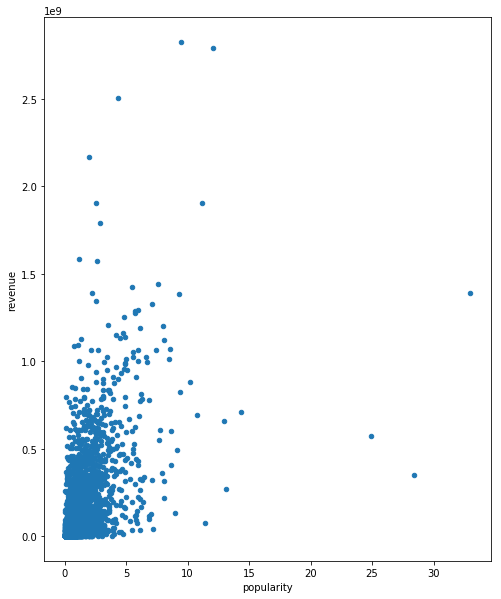

In [31]:
Revenue.plot.scatter(x = 'popularity', y = 'revenue', figsize = (8,10) )

#### From this chart, we can see that, so many movies have low revenue and low popularity, while some have low popularity and high revenue. There are some ouliers though.

### This implies that the poularity of a movie has no effect on the revenue it generates.

## Research Question 3: What is the relationship between the popularity of a movie and it's budget? 
#### I would answer this question using a scatter plot. I would use only the budget values that are not null

In [32]:
Budget = df[df['budget'].notnull()]

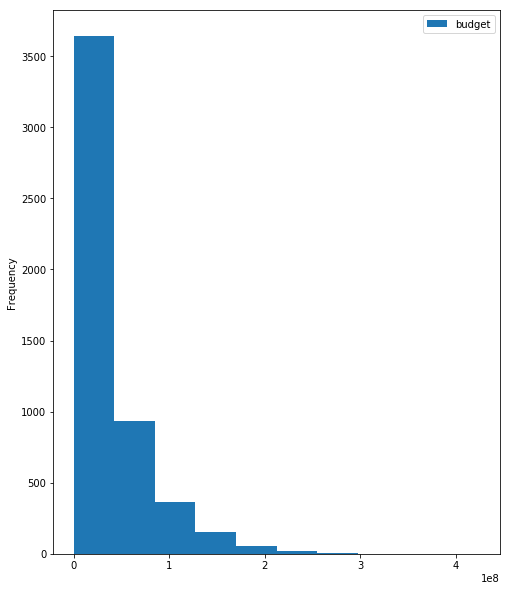

In [35]:
Budget.plot.hist(x = 'popularity', y = 'budget', figsize = (8,10))

From this chart, it is observed that the budget of a movie increases, irrespective of it's popularity. An increase in budget does not lead to an increase, or reduction in the popularity. Most movies have their popularity between zero and one

## Research Question 4: What is the relationship between the vote_average of a movie and it's popularity?

In [ ]:
Budget.plot.scatter(x = 'popularity', y = 'vote_average', fontsize = 15, figsize = (10,10))

From this chart, Movies with high popularity have higher vote average, although there are some ouliers. This implies that there is a positive correlation between popularity and vote average.

In [ ]:

df.plot.scatter(x = 'popularity', y = 'runtime', fontsize = 15, figsize = (10,10))

Movies with zero popularity have a runtime of variable lengths, while most movies have a runtime between 0 and 200, and a popularity between 0 and five.

# Conclusions
From the analysis done, I observed that:
1. The popularity of a movie has no effect on the budget and revenue of the movie, and most movies have very low popularity, irrespective of their budget and revenue. 
2. The vote average of a movie increased with it's popularity, although with a very small amount.
3. The runtime of a movie has little or no correlation with it's popularity.

### Limitations: This analysis is limited by overplotting, due to the large dataset.